In [1]:
import numpy as np
import struct
import matplotlib.pyplot as plt
from solver import *
from data_utils import *
from time import time
%load_ext autoreload
%autoreload 2
%matplotlib inline
def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

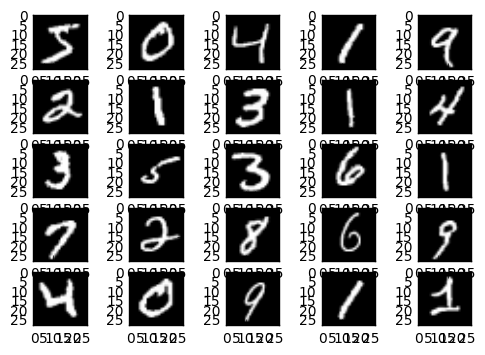

X_val:  (10000, 1, 28, 28)
X_train:  (50000, 1, 28, 28)
X_test:  (10000, 1, 28, 28)
y_val:  (10000,)
y_train:  (50000,)
y_test:  (10000,)


In [2]:
# load mnist data
data = get_mnist_data()

for idx in xrange(25):
    plt.subplot(5, 5, idx+1)
    plt.imshow(data['X_train'][idx, 0], cmap='gray')
plt.show()

X_train = data['X_train']
y_train = data['y_train']
X_val = data['X_val']
y_val = data['y_val']
X_test = data['X_test']
y_test = data['y_test']
for k, v in data.iteritems():
    print '%s: ' % k, v.shape

In [2]:
# Load the (preprocessed) CIFAR10 data.
data = get_CIFAR10_data()
X_train = data['X_train']
y_train = data['y_train']
X_val = data['X_val']
y_val = data['y_val']
X_test = data['X_test']
y_test = data['y_test']
for k, v in data.iteritems():
    print '%s: ' % k, v.shape

X_val:  (1000, 3, 32, 32)
X_train:  (49000, 3, 32, 32)
X_test:  (1000, 3, 32, 32)
y_val:  (1000,)
y_train:  (49000,)
y_test:  (1000,)


(Iteration 1 / 2450) loss: 8.877017
(Epoch 0 / 10) train acc: 0.199000; val_acc: 0.190000


layers.py:353: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(probs[np.arange(N), y])) / N


(Iteration 101 / 2450) loss: 3.121933
(Iteration 201 / 2450) loss: 2.872687
(Epoch 1 / 10) train acc: 0.426000; val_acc: 0.417000
(Iteration 301 / 2450) loss: 2.866142
(Iteration 401 / 2450) loss: 2.700245
(Epoch 2 / 10) train acc: 0.490000; val_acc: 0.461000
(Iteration 501 / 2450) loss: 2.424983
(Iteration 601 / 2450) loss: 2.353519
(Iteration 701 / 2450) loss: 2.267884
(Epoch 3 / 10) train acc: 0.533000; val_acc: 0.457000
(Iteration 801 / 2450) loss: 2.030206
(Iteration 901 / 2450) loss: 2.019332
(Epoch 4 / 10) train acc: 0.549000; val_acc: 0.473000
(Iteration 1001 / 2450) loss: 1.974472
(Iteration 1101 / 2450) loss: 1.866510
(Iteration 1201 / 2450) loss: 1.804588
(Epoch 5 / 10) train acc: 0.521000; val_acc: 0.474000
(Iteration 1301 / 2450) loss: 1.848599
(Iteration 1401 / 2450) loss: 1.585322
(Epoch 6 / 10) train acc: 0.535000; val_acc: 0.486000
(Iteration 1501 / 2450) loss: 1.695253
(Iteration 1601 / 2450) loss: 1.586562
(Iteration 1701 / 2450) loss: 1.444311
(Epoch 7 / 10) train a

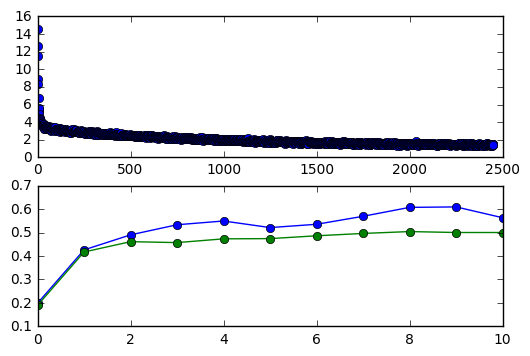

Validation set accuracy:  0.504
Test set accuracy:  0.518


In [3]:
# Train the best FullyConnectedNet that you can on CIFAR-10.
from classifiers.fc_net import *
from time import time
X_test = data['X_test']
y_test = data['y_test']
X_val = data['X_val']
y_val = data['y_val']
X_train = data['X_train']
y_train = data['y_train']
input_dim = np.prod(X_train.shape[1:])
model = FullyConnectedNet([100, 100], input_dim=input_dim, weight_scale=3e-2,reg=1e-2, use_batchnorm=False)
solver = Solver(model, data,
                num_epochs=10, batch_size=200,
                update_rule='rmsprop',
                optim_config={
                    'learning_rate': 3e-4
                },
                print_every = 100,
                verbose=True)
solver.train()

plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.show()

y_test_pred = np.argmax(model.loss(X_test), axis=1)
y_val_pred = np.argmax(model.loss(X_val), axis=1)
print 'Validation set accuracy: ', (y_val_pred == y_val).mean()
print 'Test set accuracy: ', (y_test_pred == y_test).mean()

(Iteration 1 / 2450) loss: 11.385458
(Epoch 0 / 10) train acc: 0.105000; val_acc: 0.090000
(Iteration 101 / 2450) loss: 4.734938
(Iteration 201 / 2450) loss: 4.410549
(Epoch 1 / 10) train acc: 0.341000; val_acc: 0.329000
(Iteration 301 / 2450) loss: 4.699436
(Iteration 401 / 2450) loss: 3.766414
(Epoch 2 / 10) train acc: 0.376000; val_acc: 0.359000
(Iteration 501 / 2450) loss: 3.679628
(Iteration 601 / 2450) loss: 3.660161
(Iteration 701 / 2450) loss: 3.132908
(Epoch 3 / 10) train acc: 0.398000; val_acc: 0.400000
(Iteration 801 / 2450) loss: 3.203247
(Iteration 901 / 2450) loss: 3.170247
(Epoch 4 / 10) train acc: 0.210000; val_acc: 0.231000
(Iteration 1001 / 2450) loss: 3.433203
(Iteration 1101 / 2450) loss: 3.640216
(Iteration 1201 / 2450) loss: 3.581579
(Epoch 5 / 10) train acc: 0.347000; val_acc: 0.346000
(Iteration 1301 / 2450) loss: 3.238182
(Iteration 1401 / 2450) loss: 3.462417
(Epoch 6 / 10) train acc: 0.407000; val_acc: 0.380000
(Iteration 1501 / 2450) loss: 3.298466
(Iteratio

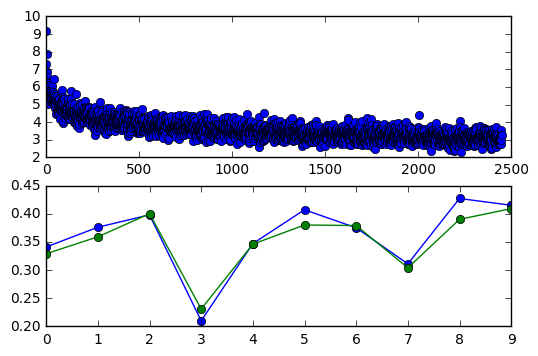

Validation set accuracy:  0.409
Test set accuracy:  0.388


In [12]:
from classifiers.bfc_net import *
num_train, num_val, num_test = 1000, 500, 500
mini_data = {
    'X_train': X_train[:num_train, :, :],
    'y_train': y_train[:num_train], 
    'X_val': X_val[:num_val, :, :],
    'y_val': y_val[:num_val], 
    'X_test': X_test[:num_test, :, :],
    'y_test': y_test[:num_test], 
}
input_dim = np.prod(X_train.shape[1:])
num_classes=10
model = BinaryFullyConnectedNet([100, 100], input_dim, num_classes, weight_scale=1e-2, use_batchnorm=True)
solver = Solver(model, data,
                num_epochs=10, batch_size=200,
                update_rule='rmsprop',
                optim_config={
                    'learning_rate': 8e-3
                },
                print_every = 100,
                verbose=True)
solver.train()

plt.subplot(2, 1, 1)
plt.plot(solver.loss_history[1:], 'o')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history[1:], '-o')
plt.plot(solver.val_acc_history[1:], '-o')
plt.show()

y_test_pred = np.argmax(model.loss(X_test), axis=1)
y_val_pred = np.argmax(model.loss(X_val), axis=1)
print 'Validation set accuracy: ', (y_val_pred == y_val).mean()
print 'Test set accuracy: ', (y_test_pred == y_test).mean()

(Iteration 1 / 2450) loss: 2.616253
(Epoch 0 / 10) train acc: 0.114000; val_acc: 0.121000
(Iteration 101 / 2450) loss: 1.857004
(Iteration 201 / 2450) loss: 1.565330
(Epoch 1 / 10) train acc: 0.453000; val_acc: 0.462000
(Iteration 301 / 2450) loss: 1.389483
(Iteration 401 / 2450) loss: 1.509676
(Epoch 2 / 10) train acc: 0.508000; val_acc: 0.488000
(Iteration 501 / 2450) loss: 1.272296
(Iteration 601 / 2450) loss: 1.228898
(Iteration 701 / 2450) loss: 1.323987
(Epoch 3 / 10) train acc: 0.524000; val_acc: 0.494000
(Iteration 801 / 2450) loss: 1.233071
(Iteration 901 / 2450) loss: 1.222721
(Epoch 4 / 10) train acc: 0.556000; val_acc: 0.534000
(Iteration 1001 / 2450) loss: 1.164797
(Iteration 1101 / 2450) loss: 1.227024
(Iteration 1201 / 2450) loss: 1.065197
(Epoch 5 / 10) train acc: 0.583000; val_acc: 0.582000
(Iteration 1301 / 2450) loss: 1.226130
(Iteration 1401 / 2450) loss: 1.005415
(Epoch 6 / 10) train acc: 0.602000; val_acc: 0.579000
(Iteration 1501 / 2450) loss: 1.079274
(Iteration

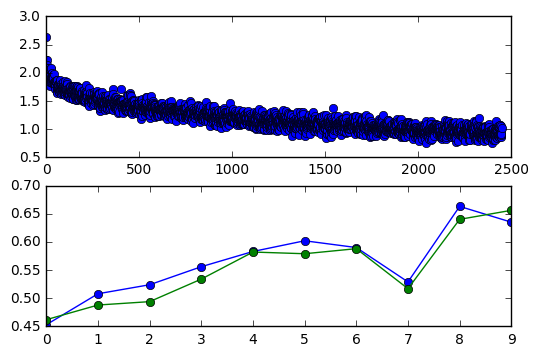

MemoryError: 

In [4]:
# binarized convolution neural networks
from classifiers.bin_convnet import BinaryConvNet
conv = lambda num, sz: {'name':'conv', 'num_filters':num, 'filter_size':sz}
pool = lambda :{'name': 'pool'}
fc = lambda sz: {'name':'affine', 'hidden_dim':sz}
# arch = [conv(4, 3), conv(8, 3), pool(), conv(16, 3), conv(32, 3), pool(), affine(64), affine(10)]
arch = [conv(64, (3, 1)), conv(64, (1, 3)), pool(), \
        conv(128, (1,3)), conv(128, (3,1)), pool(), \
        conv(256, (1,3)), conv(256, (3,1)), pool(), \
        fc(100), fc(10)]
input_dim = X_train.shape[1:]
weight_scale = 1e-1
model = BinaryConvNet(input_dim, arch, weight_scale=weight_scale, use_batchnorm=True)
solver = Solver(model, data,
                num_epochs=10, batch_size=200,
                update_rule='rmsprop',
                optim_config={
                    'learning_rate': 5e-3
                },
                print_every = 100,
                verbose=True)
solver.train()

plt.subplot(2, 1, 1)
plt.plot(solver.loss_history[1:], 'o')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history[1:], '-o')
plt.plot(solver.val_acc_history[1:], '-o')
plt.show()

y_test_pred = np.argmax(model.loss(X_test), axis=1)
y_val_pred = np.argmax(model.loss(X_val), axis=1)
print 'Validation set accuracy: ', (y_val_pred == y_val).mean()
print 'Test set accuracy: ', (y_test_pred == y_test).mean()

Validation set accuracy:  0.9281
Test set accuracy:  0.9268
